# ANÁLISIS EXPLORATORIO DE LOS DATOS

# 1. Software

In [1]:
import os, sys
working_dir = os.getcwd()
print(f"Directorio actual: {working_dir}")

Directorio actual: /mnt/homeGPU/dgonzalez/tfg-bioprofile-uncertainty


In [ ]:
data_dir = working_dir + "/data/AE_maxillofacial/preprocessed/"
print(f"Directorio de los datos: {data_dir}")

Directorio de los datos: /mnt/homeGPU/dgonzalez/tfg-bioprofile-uncertainty/data/AE_maxillofacial/preprocessed/


In [3]:
# Manipulación de datos
import numpy as np
import pandas as pd
from PIL import Image

# Visualización de datos
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.io.renderers.default = "vscode"

## 2. Carga de datos

El problema al que nos enfrentamos es uno de **estimación de edad forense**. 

In [4]:
# Carga los datos de train
train_data = pd.read_csv(data_dir + 'metadata_train.csv')
train_data.drop(columns=["Fold","Sample"], inplace=True)

# Carga los datos de test
test_data = pd.read_csv(data_dir + 'metadata_test.csv')
test_data.drop(columns=["Sample"], inplace=True)

#
dataset = pd.concat([train_data, test_data], ignore_index=True)

#
display(dataset)

,ID,Sex,Age
0,Turkey22YM99.jpg,M,22.515068
1,Kosovo1915173974.jpg,M,21.000000
2,Lebanon882.jpg,F,18.468493
3,Bosnia20Y39F.jpg,F,19.786301
4,Malasya461.jpg,M,20.783562
...,...,...,...
10734,Japan3_367_3533034.jpg,F,21.868494
10735,Kosovo0915449533.jpg,F,14.000000
10736,UgandaP399.jpg,M,23.400000
10737,Kosovo1915383547.jpg,F,17.080000


In [ ]:
dataset['Age'].mean()

np.float64(19.12605690303338)

Tenemos un total de 10.739 ejemplos en total.
...
Veamos las edades de los individuos del dataset:

In [6]:
dataset['Sex'].value_counts()

Sex
F    5756
M    4983
Name: count, dtype: int64

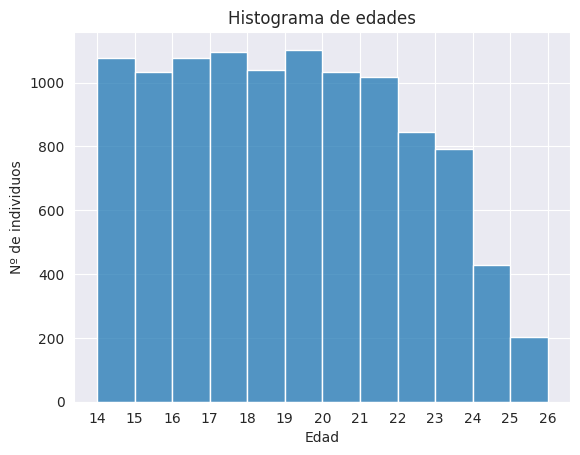

In [19]:
# Muestra un histograma con las edades enteras presentes en el dataset
sns.histplot(dataset['Age'], binwidth=1, kde=False)
plt.title('Histograma de edades')
plt.xlabel('Edad')
plt.ylabel('Nº de individuos')
min_age = int(dataset['Age'].min())
max_age = int(dataset['Age'].max())
plt.xticks(range(min_age, max_age + 1))
plt.show()

/tmp/ipykernel_21595/3233668762.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




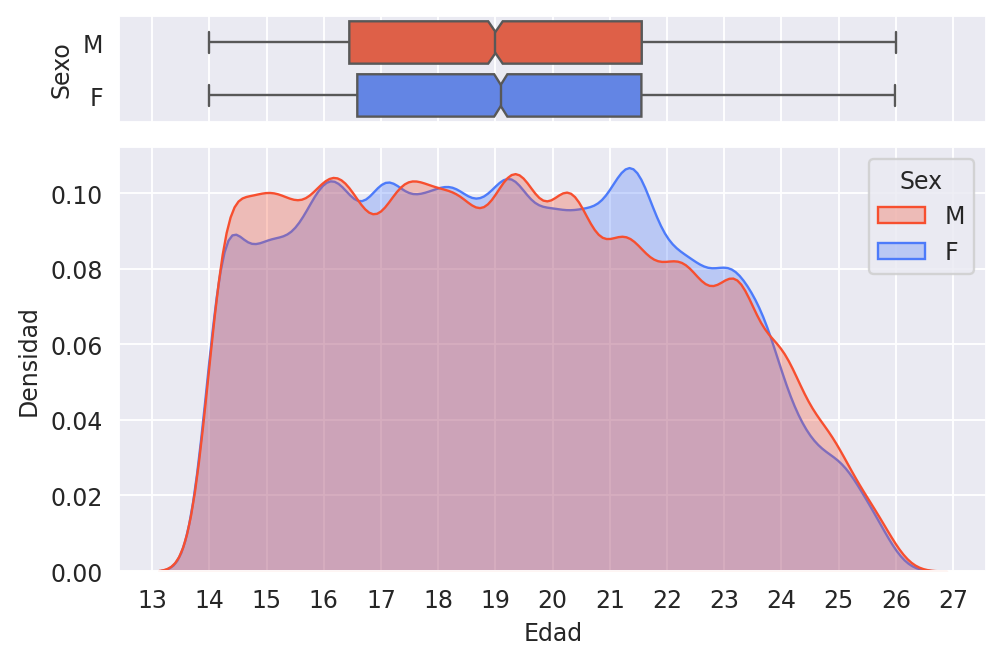

In [20]:
sns.set_style("darkgrid")

sex_colors = {"M": "#f74f2f", "F": "#4d7bfa" } 

fig, axs = plt.subplots(2, 1, figsize=(6, 4), dpi=170, gridspec_kw={'height_ratios': [1, 4]}, sharex=True)

# Boxplot
sns.boxplot(
    data=train_data,
    x="Age",
    y="Sex",
    palette=sex_colors,
    notch=True,
    flierprops={"marker": "x"},
    ax=axs[0],
    orient="h"
)
axs[0].set_ylabel("Sexo")

# KDE
sns.kdeplot(
    data=train_data,
    x="Age",
    hue="Sex",
    palette=sex_colors,
    fill=True,
    common_norm=False,
    alpha=0.3,
    linewidth=1,
    ax=axs[1],
    legend=True,
    bw_adjust=0.5
)
axs[1].set_xlabel("Edad")
axs[1].set_ylabel("Densidad")

# Poner los ticks del eje X de 1 en 1
axs[0].xaxis.set_major_locator(MultipleLocator(1))

plt.tight_layout()
plt.show()


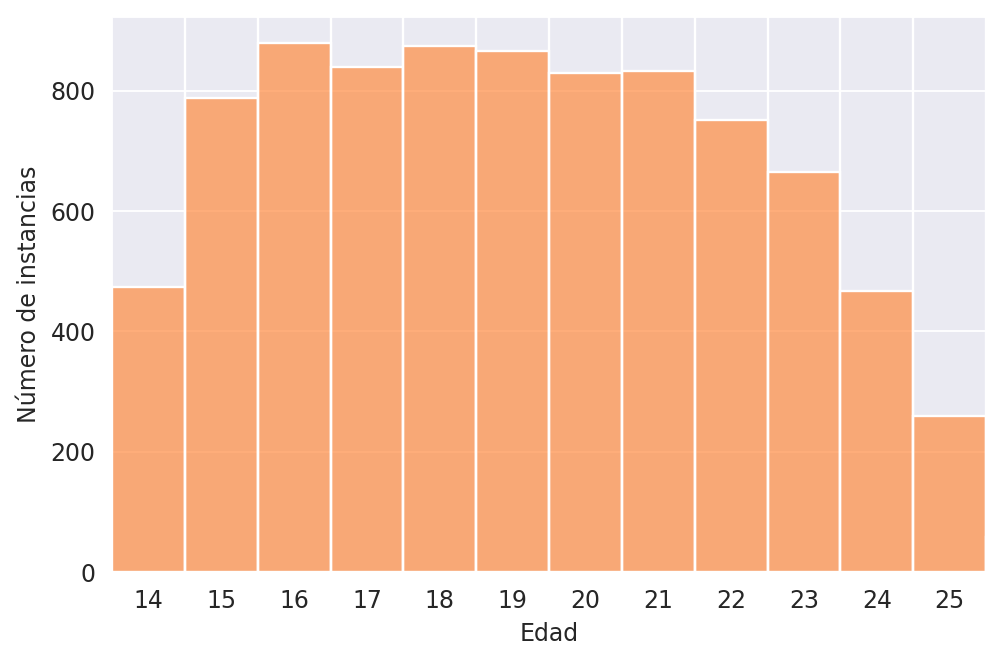

In [69]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(6, 4), dpi=170)

# --- Histograma simple de edades ---
sns.histplot(
    data=train_data,
    x="Age",
    binwidth=1,
    discrete=True,
    color='#FF8C42',
    alpha=0.7,
    ax=ax
)

# Ejes y límites
ax.set_xlabel("Edad")
ax.set_ylabel("Número de instancias")
ax.set_xlim(13.5, 25.5)

# Ticks principales en los enteros
ax.xaxis.set_major_locator(MultipleLocator(1))

# Desactivar grid vertical original
ax.grid(False, axis='x')  

# Crear grid vertical desplazado 0.5
shifted_ticks = [x + 0.5 for x in range(14, 26)]  # Ajusta según tu xlim
for tick in shifted_ticks:
    ax.axvline(x=tick, color='white', linestyle='-', linewidth=1.0, alpha=1.0)

plt.tight_layout()
plt.show()

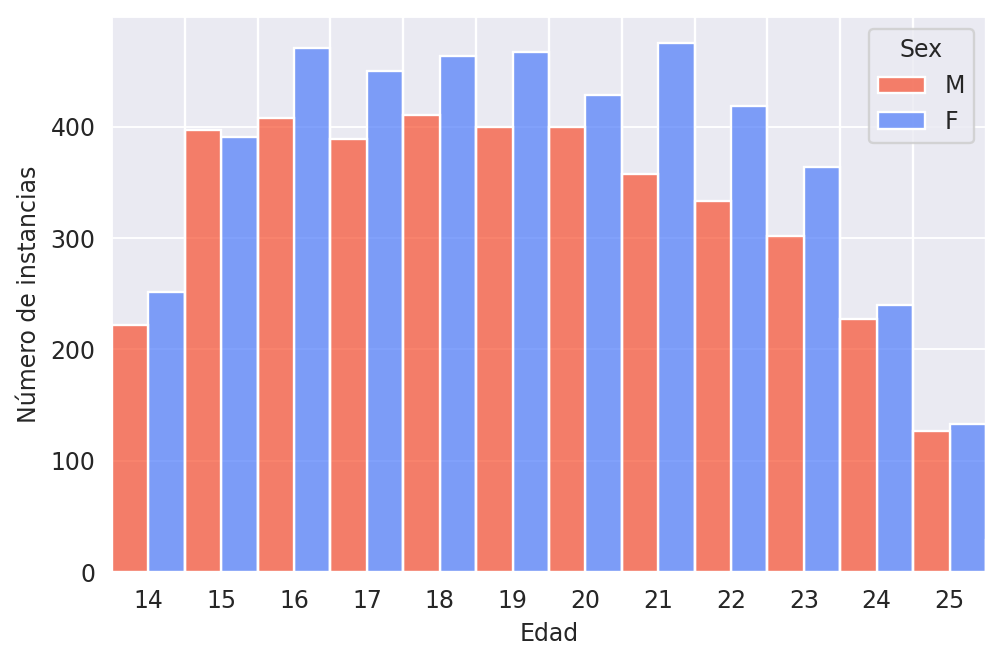

In [68]:
sns.set_style("darkgrid")

sex_colors = {"M": "#f74f2f", "F": "#4d7bfa"} 

fig, ax = plt.subplots(figsize=(6, 4), dpi=170)

# Histograma con bins de 1 año
sns.histplot(
    data=train_data,
    x="Age",
    hue="Sex",
    palette=sex_colors,
    binwidth=1,
    multiple="dodge",
    discrete=True,
    alpha=0.7,
    ax=ax
)

# Ejes y límites
ax.set_xlabel("Edad")
ax.set_ylabel("Número de instancias")
ax.set_xlim(13.5, 25.5) 

# Ticks principales en los enteros
ax.xaxis.set_major_locator(MultipleLocator(1))

# Desactivar grid vertical original
ax.grid(False, axis='x')  

# Crear grid vertical desplazado 0.5
shifted_ticks = [x + 0.5 for x in range(14, 26)]  # Ajusta según tu xlim
for tick in shifted_ticks:
    ax.axvline(x=tick, color='white', linestyle='-', linewidth=1.0, alpha=1.0)

plt.tight_layout()
plt.show()

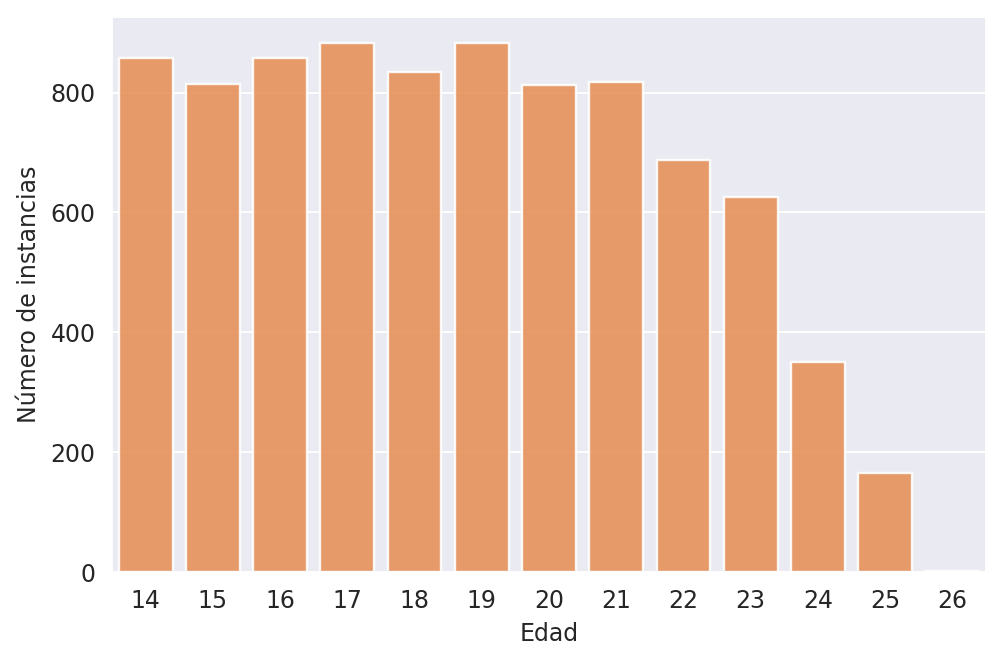

In [86]:
# Discretizar la edad: convertirla en enteros
train_data['Age_int'] = train_data['Age'].astype(int)

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(6, 4), dpi=170)

# Countplot sobre edades discretizadas
sns.countplot(
    data=train_data,
    x="Age_int",
    width=0.8,  # ancho de cada barra individual
    color='#FF8C42',
    alpha=0.9,
    ax=ax
)

# Ejes y límites
ax.set_xlabel("Edad")
ax.set_ylabel("Número de instancias")
# ax.set_xlim(13.5, 25.5) 

# Ticks principales en los enteros
ax.xaxis.set_major_locator(MultipleLocator(1))

# Desactivar grid vertical original
ax.grid(False, axis='x')  

# # Crear grid vertical desplazado 0.5
# shifted_ticks = [x + 0.5 for x in range(14, 26)]
# for tick in shifted_ticks:
#     ax.axvline(x=tick, color='white', linestyle='-', linewidth=1.0, alpha=1.0)

plt.tight_layout()
plt.show()

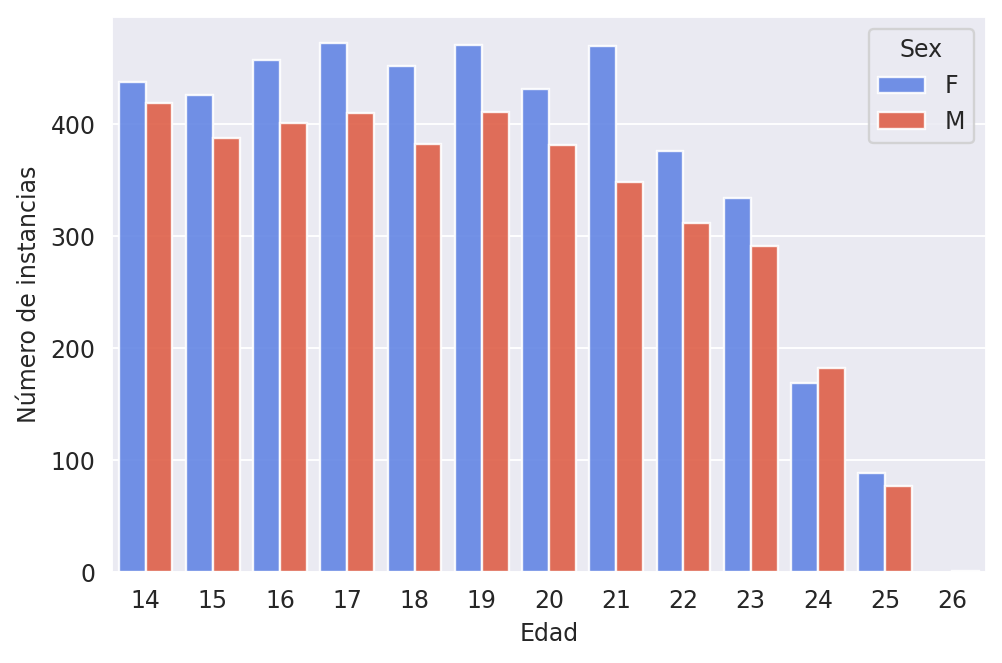

In [ ]:
# Discretizar la edad: convertirla en enteros
train_data['Age_int'] = train_data['Age'].astype(int)

sns.set_style("darkgrid")

sex_colors = {"M": "#f74f2f", "F": "#4d7bfa"} 

fig, ax = plt.subplots(figsize=(6, 4), dpi=170)

# Countplot sobre edades discretizadas
sns.countplot(
    data=train_data,
    x="Age_int",
    hue="Sex",
    palette=sex_colors,
    alpha=0.9,
    width=0.8,  # ancho de cada barra individual
    ax=ax
)

# Ejes y límites
ax.set_xlabel("Edad")
ax.set_ylabel("Número de instancias")
# ax.set_xlim(13.5, 25.5) 

# Ticks principales en los enteros
ax.xaxis.set_major_locator(MultipleLocator(1))

# Desactivar grid vertical original
ax.grid(False, axis='x')  

# # Crear grid vertical desplazado 0.5
# shifted_ticks = [x + 0.5 for x in range(14, 26)]
# for tick in shifted_ticks:
#     ax.axvline(x=tick, color='white', linestyle='-', linewidth=1.0, alpha=1.0)

plt.tight_layout()
plt.show()

Las edades van de 14 a 26 años, siendo superior la muestra entre 14 a 21 y cada vez menor hasta los 26 años.

In [9]:
train_data['intAge'] = np.floor(train_data['Age'].astype(float).to_numpy()).astype(int)

test_data['intAge'] = np.floor(test_data['Age'].astype(float).to_numpy()).astype(int)

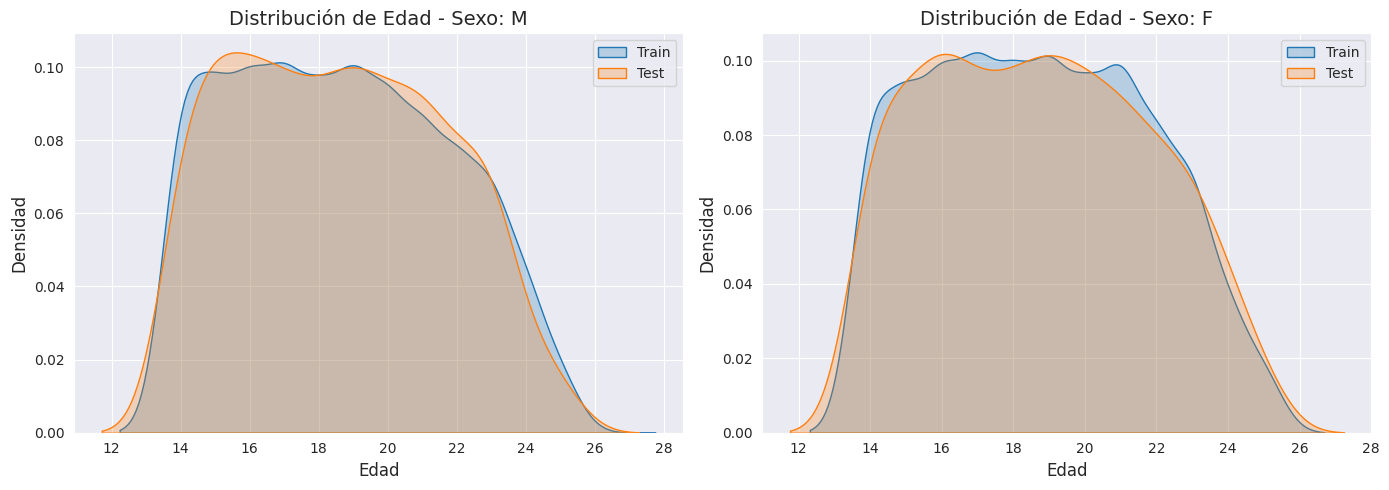

In [38]:
# Creamos el canvas con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 7), dpi=150)

# Para sexo 'M'
sns.kdeplot(train_data[train_data['Sex'] == 'M']['intAge'], label='Train', ax=axes[0], fill=True)
sns.kdeplot(test_data[test_data['Sex'] == 'M']['intAge'], label='Test', ax=axes[0], fill=True)
axes[0].set_title("Distribución de Edad - Sexo: M")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Densidad")
axes[0].legend()

# Para sexo 'F'
sns.kdeplot(train_data[train_data['Sex'] == 'F']['intAge'], label='Train', ax=axes[1], fill=True)
sns.kdeplot(test_data[test_data['Sex'] == 'F']['intAge'], label='Test', ax=axes[1], fill=True)
axes[1].set_title("Distribución de Edad - Sexo: F")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Densidad")
axes[1].legend()

plt.tight_layout()
plt.show()